# **Phase 1: Data Loading and Initial Exploration**

## Importing Necessary Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Initial Exploration

In [2]:
df = pd.read_csv('data.csv')

In [3]:
print("DATASET OVERVIEW")
print("-" * 20)
print(f"Dataset shape: {df.shape}")
print(f"Total Number of Cohort 3 Trainees: {len(df)}")

DATASET OVERVIEW
--------------------
Dataset shape: (115, 15)
Total Number of Cohort 3 Trainees: 115


In [4]:
print("\nColumn Information:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


Column Information:
 1. Timestamp
 2. ID_No
 3. Age_range
 4. Gender
 5. Country
 6. Source
 7. Experience
 8. Track
 9. Hours_per_week
10. Main_aim
11. Motivation
12. Skill_level
13. Test_completed
14. Total_score
15. Graduated


In [5]:
print(f"\nFirst 5 rows:")
print(df.head())


First 5 rows:
         Timestamp  ID_No    Age_range  Gender Country         Source  \
0  12/1/2024 23:50  DS301  18-24 years    Male   Kenya  Word of mouth   
1   12/3/2024 9:35  DS302  25-34 years    Male   Kenya       WhatsApp   
2  12/3/2024 19:16  DS303  18-24 years  Female   Kenya       WhatsApp   
3  12/3/2024 12:52  DS304  18-24 years  Female   Kenya       WhatsApp   
4  12/3/2024 18:12  DS305  18-24 years    Male   Kenya       WhatsApp   

             Experience         Track      Hours_per_week Main_aim  \
0  Less than six months  Data Science   less than 6 hours  Upskill   
1     6 months - 1 year  Data Science  more than 14 hours  Upskill   
2     6 months - 1 year  Data Science  more than 14 hours  Upskill   
3     6 months - 1 year  Data Science          7-14 hours  Upskill   
4  Less than six months  Data Science          7-14 hours  Upskill   

                                          Motivation   Skill_level  \
0            to enter into the Data Analytics career   

In [6]:
print(f"\nData Types:")
print(df.dtypes)


Data Types:
Timestamp          object
ID_No              object
Age_range          object
Gender             object
Country            object
Source             object
Experience         object
Track              object
Hours_per_week     object
Main_aim           object
Motivation         object
Skill_level        object
Test_completed     object
Total_score       float64
Graduated          object
dtype: object


In [7]:
print(f"\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Timestamp         0
ID_No             0
Age_range         0
Gender            0
Country           0
Source            0
Experience        0
Track             0
Hours_per_week    0
Main_aim          0
Motivation        0
Skill_level       0
Test_completed    0
Total_score       0
Graduated         0
dtype: int64


# **Phase 2: Data Cleaning and Preprocessing**

## Preprocessing

In [8]:
# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [9]:
# Clean and standardize categorical variables
df['Graduated'] = df['Graduated'].map({'Yes': 1, 'No': 0})
df['Test_completed'] = df['Test_completed'].map({'Yes': 1, 'No': 0})

In [10]:
# Create numerical mappings for categorical variables
experience_mapping = {
    'Less than six months': 0,
    '6 months - 1 year': 1,
    '1-3 years': 2,
    '4-6 years': 3
}

hours_mapping = {
    'less than 6 hours': 1,
    '7-14 hours': 2,
    'more than 14 hours': 3
}

skill_mapping = {
    'Beginner': 1,
    'Elementary': 2,
    'Intermediate': 3,
    'Advanced': 4
}

age_mapping = {
    '18-24 years': 1,
    '25-34 years': 2,
    '35-44 years': 3,
    '45-54 years': 4
}

In [11]:
# Apply mappings
df['Experience_numeric'] = df['Experience'].map(experience_mapping)
df['Hours_numeric'] = df['Hours_per_week'].map(hours_mapping)
df['Skill_numeric'] = df['Skill_level'].map(skill_mapping)
df['Age_numeric'] = df['Age_range'].map(age_mapping)

In [12]:
# Fill any missing values with median for numeric columns
numeric_columns = ['Experience_numeric', 'Hours_numeric', 'Skill_numeric', 'Age_numeric', 'Total_score']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [13]:
print("✓ Data cleaning completed")
print("✓ Categorical variables encoded")
print("✓ Missing values handled")
print(f"✓ Final dataset shape: {df.shape}")

✓ Data cleaning completed
✓ Categorical variables encoded
✓ Missing values handled
✓ Final dataset shape: (115, 19)


## Data Preview Post Preprocessing

In [14]:
df.head()

,Timestamp,ID_No,Age_range,Gender,Country,Source,Experience,Track,Hours_per_week,Main_aim,Motivation,Skill_level,Test_completed,Total_score,Graduated,Experience_numeric,Hours_numeric,Skill_numeric,Age_numeric
0,2024-12-01 23:50:00,DS301,18-24 years,Male,Kenya,Word of mouth,Less than six months,Data Science,less than 6 hours,Upskill,to enter into the Data Analytics career,Beginner,1,58.666667,0,0,1,1,1
1,2024-12-03 09:35:00,DS302,25-34 years,Male,Kenya,WhatsApp,6 months - 1 year,Data Science,more than 14 hours,Upskill,To grow and improve my skills in Data Science ...,Elementary,1,70.000000,0,1,3,2,2
2,2024-12-03 19:16:00,DS303,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data Science,more than 14 hours,Upskill,I’m motivated to join Everything Data to enhan...,Intermediate,1,64.333333,1,1,3,3,1
3,2024-12-03 12:52:00,DS304,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data Science,7-14 hours,Upskill,I'd like to upskill and Join the Data Community,Intermediate,1,75.000000,0,1,2,3,1
4,2024-12-03 18:12:00,DS305,18-24 years,Male,Kenya,WhatsApp,Less than six months,Data Science,7-14 hours,Upskill,I aim to join the mentorship program to enhanc...,Beginner,1,59.000000,0,0,2,1,1


# **Phase 3: Exploratory Data Analysis (EDA)**

In [15]:
%matplotlib inline

## Demographic Analysis

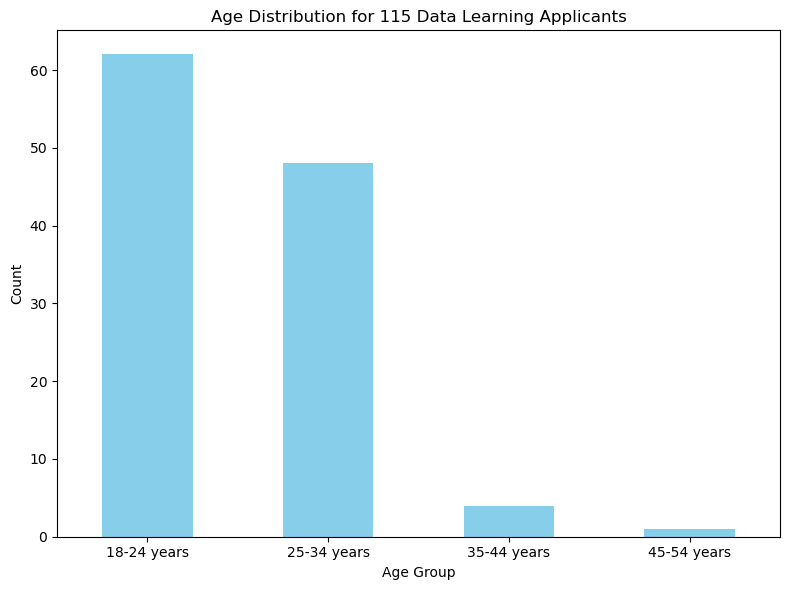

In [16]:
# Age 
plt.figure(figsize=(8, 6))
df['Age_range'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Age Distribution for 115 Data Learning Applicants')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

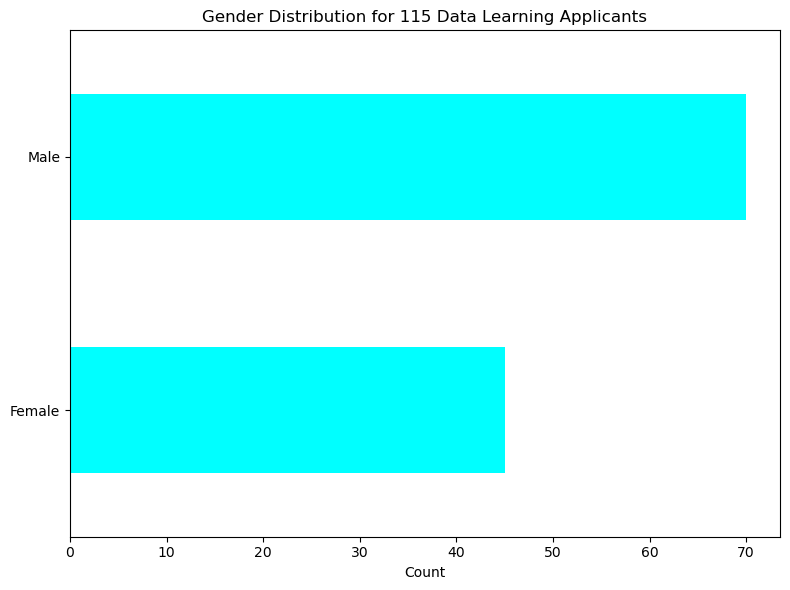

In [17]:
# Gender
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().sort_values(ascending=True).plot(kind='barh', color = 'cyan')
plt.title('Gender Distribution for 115 Data Learning Applicants')
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.savefig('gender_distribution.png')

In [18]:
print(df['Gender'].value_counts())

Gender
Male      70
Female    45
Name: count, dtype: int64


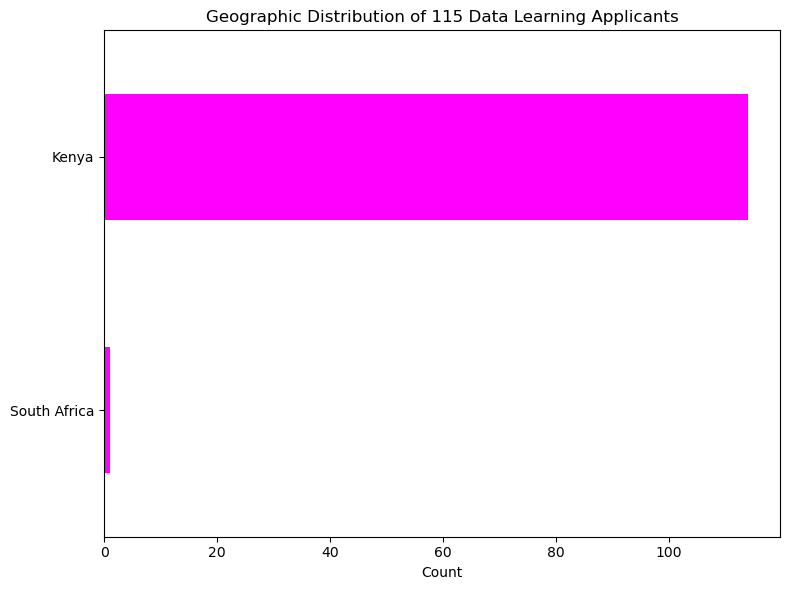

In [19]:
# Geographic Distribution
plt.figure(figsize=(8, 6))
df['Country'].value_counts().sort_values(ascending=True).plot(kind='barh', color = 'magenta')
plt.title('Geographic Distribution of 115 Data Learning Applicants')
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.savefig('geographic_distribution.png')

In [20]:
print(df['Country'].value_counts())

Country
Kenya           114
South Africa      1
Name: count, dtype: int64


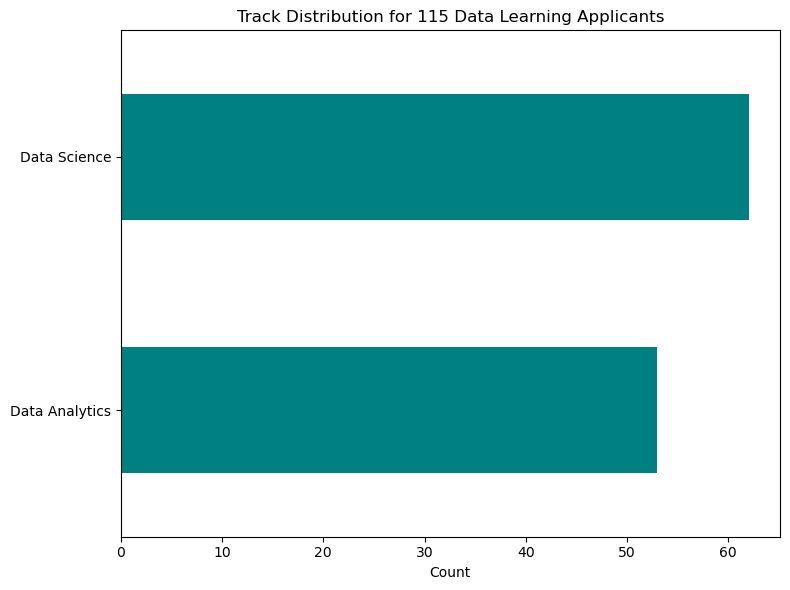

In [21]:
# Track Distribution
plt.figure(figsize=(8, 6))
df['Track'].value_counts().sort_values(ascending=True).plot(kind='barh', color = 'teal')
plt.title('Track Distribution for 115 Data Learning Applicants')
plt.xlabel('Count')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('track_distribution.png')
plt.show()

In [22]:
print(df['Track'].value_counts())

Track
Data Science      62
Data Analytics    53
Name: count, dtype: int64


## Experience and Commitment Analysis 

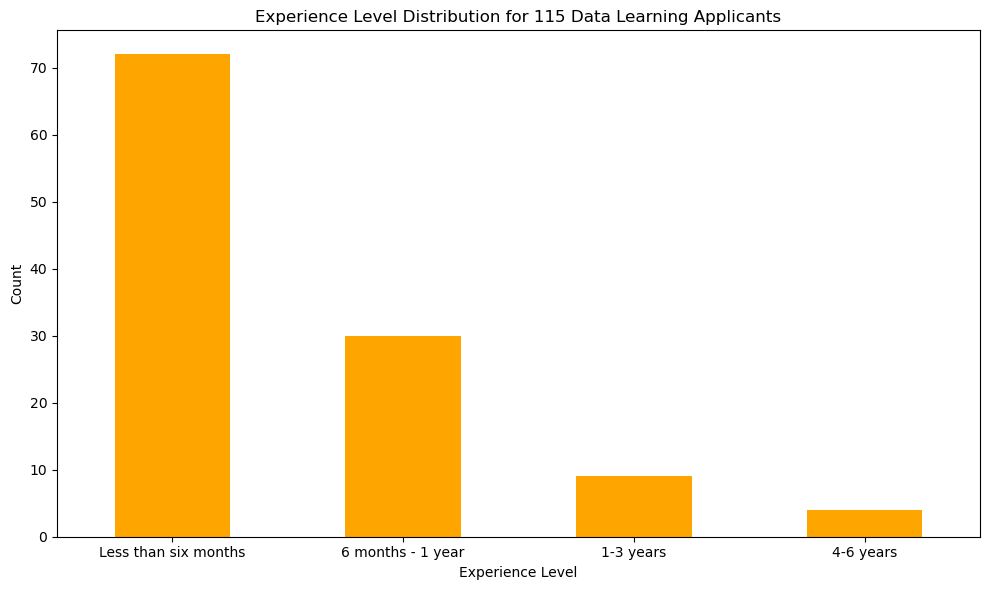

In [23]:
# Experience Level Distribution
plt.figure(figsize=(10, 6))
df['Experience'].value_counts().plot(kind='bar', color='orange')
plt.title('Experience Level Distribution for 115 Data Learning Applicants')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('experience_distribution.png')
plt.show()

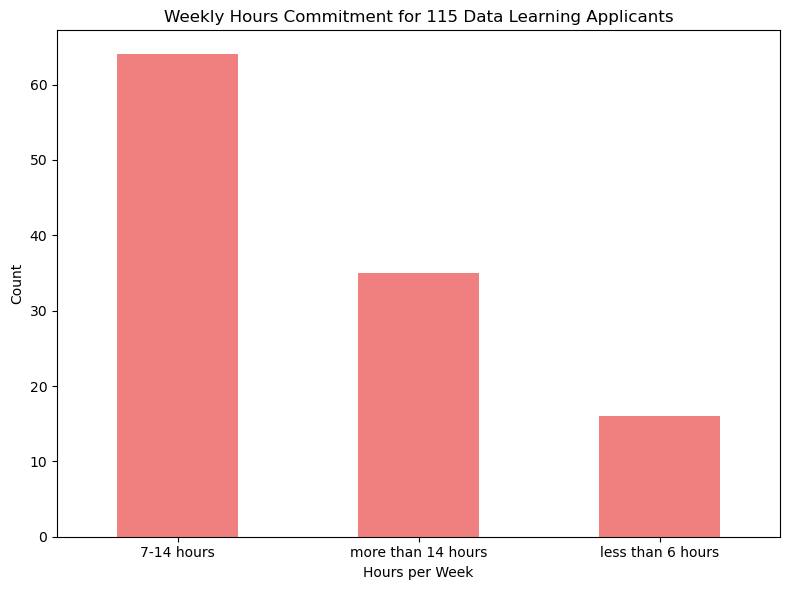

In [24]:
# Weekly Hours Commitment
plt.figure(figsize=(8, 6))
df['Hours_per_week'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Weekly Hours Commitment for 115 Data Learning Applicants')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('hours_commitment.png')
plt.show()

In [25]:
print(df['Hours_per_week'].value_counts())

Hours_per_week
7-14 hours            64
more than 14 hours    35
less than 6 hours     16
Name: count, dtype: int64


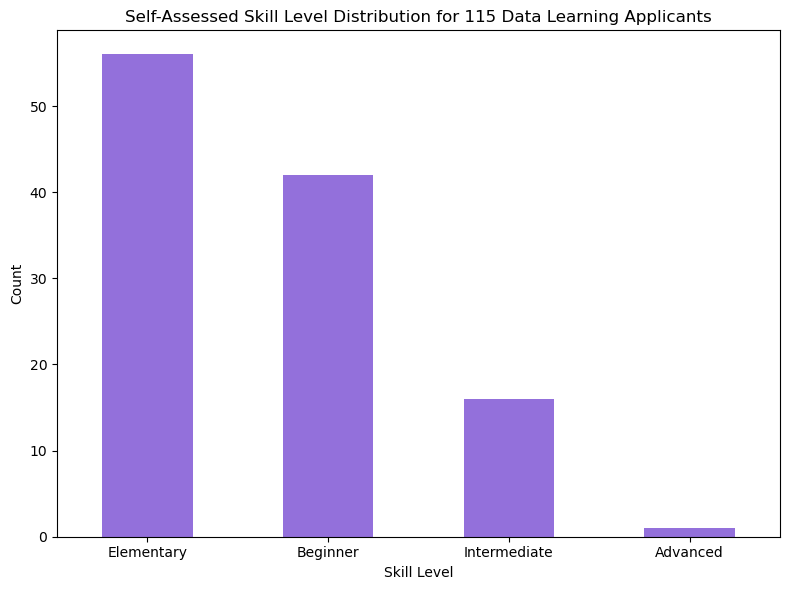

In [26]:
# Self-Assessed Skill Level
plt.figure(figsize=(8, 6))
df['Skill_level'].value_counts().plot(kind='bar', color='mediumpurple')
plt.title('Self-Assessed Skill Level Distribution for 115 Data Learning Applicants')
plt.xlabel('Skill Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('skill_level_distribution.png')
plt.show()

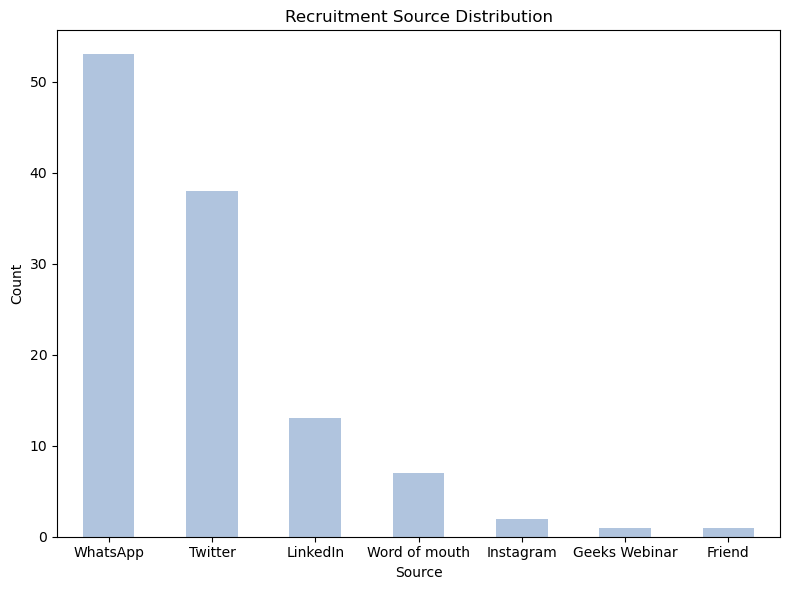

In [27]:
# Recruitment Source Analysis
plt.figure(figsize=(8, 6))
df['Source'].value_counts().plot(kind='bar', color='lightsteelblue')
plt.title('Recruitment Source Distribution')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('recruitment_source.png')
plt.show()

## Performance Analysis

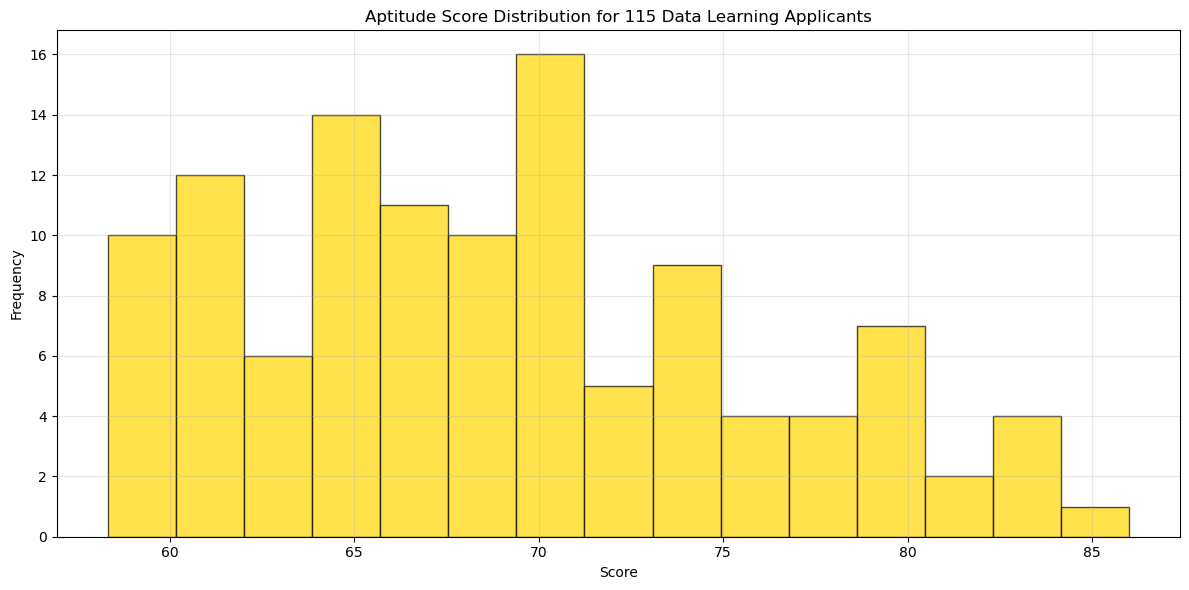

In [29]:
# Aptitude Score Distribution
plt.figure(figsize=(12, 6))
df['Total_score'].hist(bins=15, color='gold', alpha=0.7, edgecolor='black')
plt.title('Aptitude Score Distribution for 115 Data Learning Applicants')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('score_distribution.png')
plt.show()

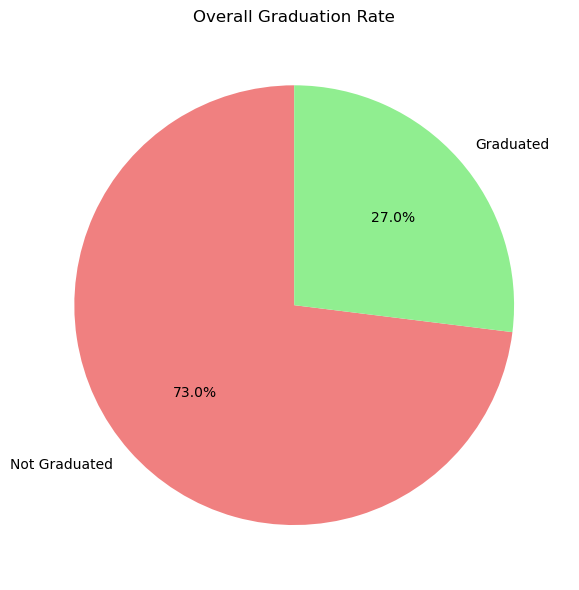

In [32]:
# Overall Graduation Rate
plt.figure(figsize=(8, 6))
grad_counts = df['Graduated'].value_counts()
grad_labels = ['Not Graduated', 'Graduated']
plt.pie(grad_counts.values, labels=grad_labels, autopct='%1.1f%%', 
        colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Overall Graduation Rate')
plt.tight_layout()
plt.savefig('overall_graduation_rate.png')
plt.show()

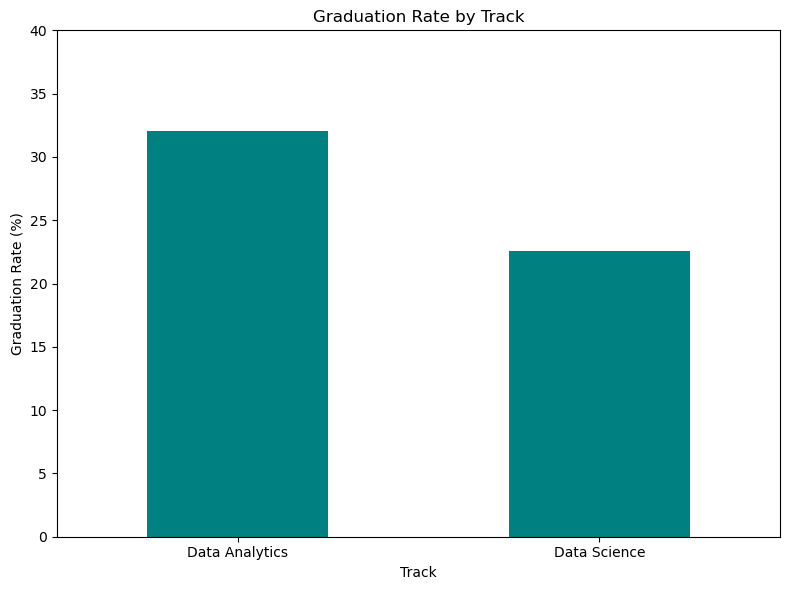

In [33]:
# Graduation Rate by Track
plt.figure(figsize=(8, 6))
graduation_by_track = df.groupby('Track')['Graduated'].mean() * 100
graduation_by_track.plot(kind='bar', color='teal')
plt.title('Graduation Rate by Track')
plt.xlabel('Track')
plt.ylabel('Graduation Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 40)
plt.tight_layout()
plt.savefig('graduation_rate_by_track.png')
plt.show()

In [34]:
print(graduation_by_track)

Track
Data Analytics    32.075472
Data Science      22.580645
Name: Graduated, dtype: float64


In [35]:
print("\nKEY STATISTICS:")
print("-" * 15)
print(f"Overall Graduation Rate: {df['Graduated'].mean()*100:.1f}%")
print(f"Average Aptitude Score: {df['Total_score'].mean():.2f}")
print(f"Score Standard Deviation: {df['Total_score'].std():.2f}")

print(f"\nGraduation Rate by Track:")
for track in df['Track'].unique():
    rate = df[df['Track'] == track]['Graduated'].mean() * 100
    print(f"  {track}: {rate:.1f}%")

print(f"\nGraduation Rate by Experience Level:")
for exp in df['Experience'].unique():
    rate = df[df['Experience'] == exp]['Graduated'].mean() * 100
    count = len(df[df['Experience'] == exp])
    print(f"  {exp}: {rate:.1f}% (n={count})")


KEY STATISTICS:
---------------
Overall Graduation Rate: 27.0%
Average Aptitude Score: 69.01
Score Standard Deviation: 6.81

Graduation Rate by Track:
  Data Science: 22.6%
  Data Analytics: 32.1%

Graduation Rate by Experience Level:
  Less than six months: 27.8% (n=72)
  6 months - 1 year: 23.3% (n=30)
  1-3 years: 11.1% (n=9)
  4-6 years: 75.0% (n=4)


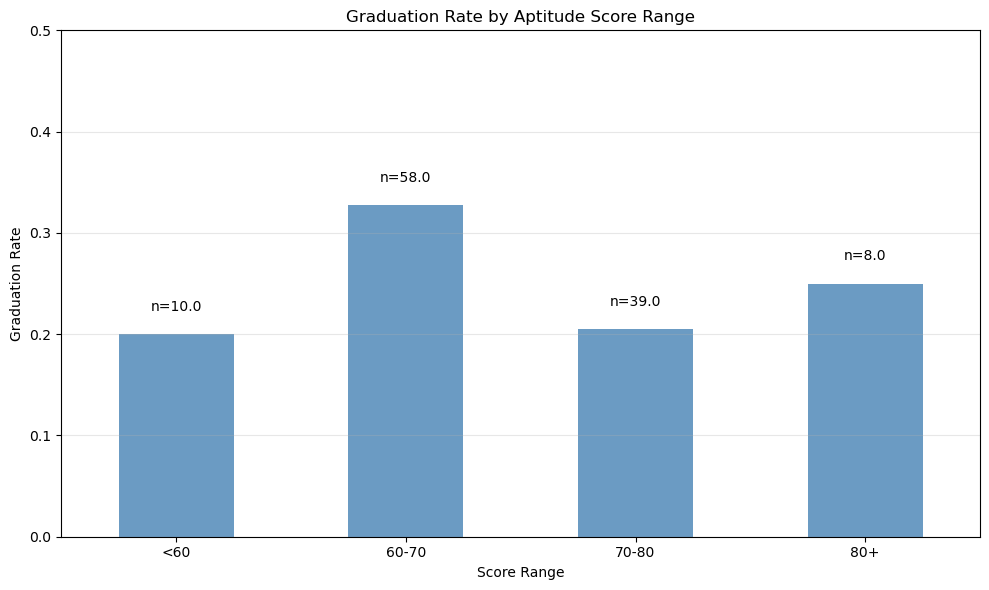

In [38]:
# 11. Graduation Rate by Total Score (Binned)
plt.figure(figsize=(10, 6))
# Create score bins for better visualization
df['Score_bins'] = pd.cut(df['Total_score'], 
                         bins=[0, 60, 70, 80, 100], 
                         labels=['<60', '60-70', '70-80', '80+'])
grad_by_score = df.groupby('Score_bins')['Graduated'].agg(['mean', 'count'])
grad_by_score['mean'].plot(kind='bar', color='steelblue', alpha=0.8)
plt.title('Graduation Rate by Aptitude Score Range')
plt.xlabel('Score Range')
plt.ylabel('Graduation Rate')
plt.xticks(rotation=0)
plt.ylim(0, 0.5)
# Add count labels on bars
for i, (idx, row) in enumerate(grad_by_score.iterrows()):
    plt.text(i, row['mean'] + 0.02, f'n={row["count"]}', 
             ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('graduation_rate_by_score.png')
plt.show()

In [39]:
print(f"\nGraduation Rate by ATS Score:")
for exp in df['Score_bins'].unique():
    rate = df[df['Score_bins'] == exp]['Graduated'].mean() * 100
    count = len(df[df['Score_bins'] == exp])
    print(f"  {exp}: {rate:.1f}% (n={count})")


Graduation Rate by ATS Score:
  <60: 20.0% (n=10)
  60-70: 32.8% (n=58)
  70-80: 20.5% (n=39)
  80+: 25.0% (n=8)


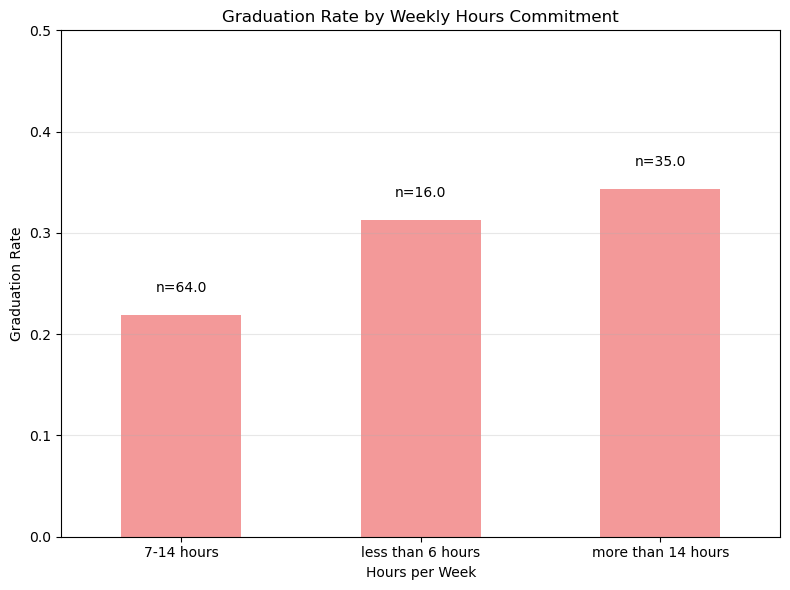

In [41]:
# 12. Graduation Rate by Hours Commitment
plt.figure(figsize=(8, 6))
grad_by_hours = df.groupby('Hours_per_week')['Graduated'].agg(['mean', 'count'])
grad_by_hours['mean'].plot(kind='bar', color='lightcoral', alpha=0.8)
plt.title('Graduation Rate by Weekly Hours Commitment')
plt.xlabel('Hours per Week')
plt.ylabel('Graduation Rate')
plt.xticks(rotation=0)
plt.ylim(0, 0.5)
# Add count labels on bars
for i, (idx, row) in enumerate(grad_by_hours.iterrows()):
    plt.text(i, row['mean'] + 0.02, f'n={row["count"]}', 
             ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('graduation_rate_by_hours.png')
plt.show()

In [42]:
print(f"\nGraduation Rate by Hours per Week Commitment:")
for exp in df['Hours_per_week'].unique():
    rate = df[df['Hours_per_week'] == exp]['Graduated'].mean() * 100
    count = len(df[df['Hours_per_week'] == exp])
    print(f"  {exp}: {rate:.1f}% (n={count})")


Graduation Rate by Hours per Week Commitment:
  less than 6 hours: 31.2% (n=16)
  more than 14 hours: 34.3% (n=35)
  7-14 hours: 21.9% (n=64)


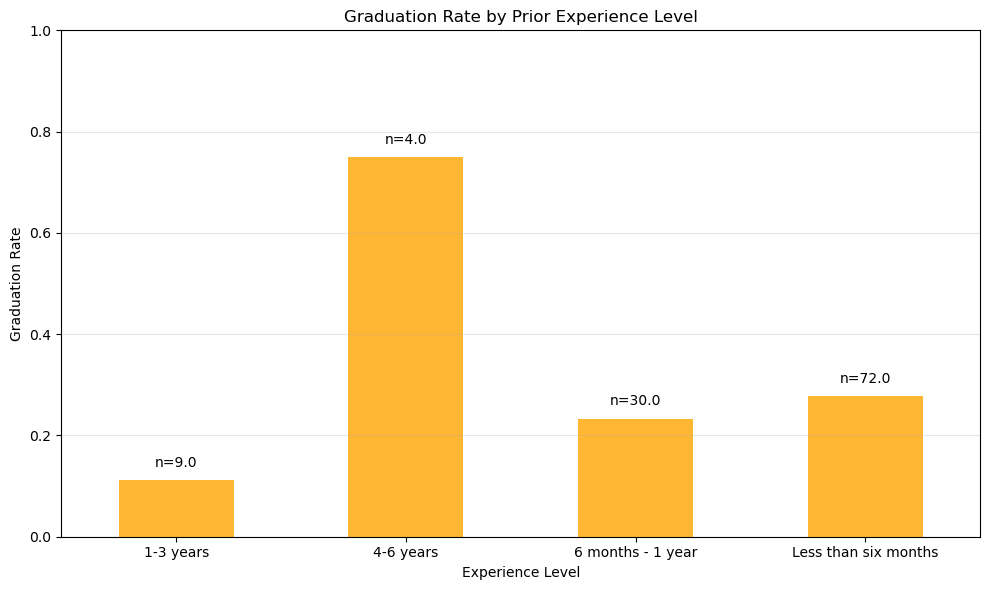

In [43]:
# 13. Graduation Rate by Experience Level
plt.figure(figsize=(10, 6))
grad_by_exp = df.groupby('Experience')['Graduated'].agg(['mean', 'count'])
grad_by_exp['mean'].plot(kind='bar', color='orange', alpha=0.8)
plt.title('Graduation Rate by Prior Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Graduation Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
# Add count labels on bars
for i, (idx, row) in enumerate(grad_by_exp.iterrows()):
    plt.text(i, row['mean'] + 0.02, f'n={row["count"]}', 
             ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('graduation_rate_by_experience.png')
plt.show()

## Correlation Analysis

In [44]:
# Create correlation matrix
correlation_features = ['Age_numeric', 'Experience_numeric', 'Hours_numeric', 
                       'Skill_numeric', 'Total_score', 'Graduated']
corr_matrix = df[correlation_features].corr()

In [45]:
corr_data = df[correlation_features].copy()

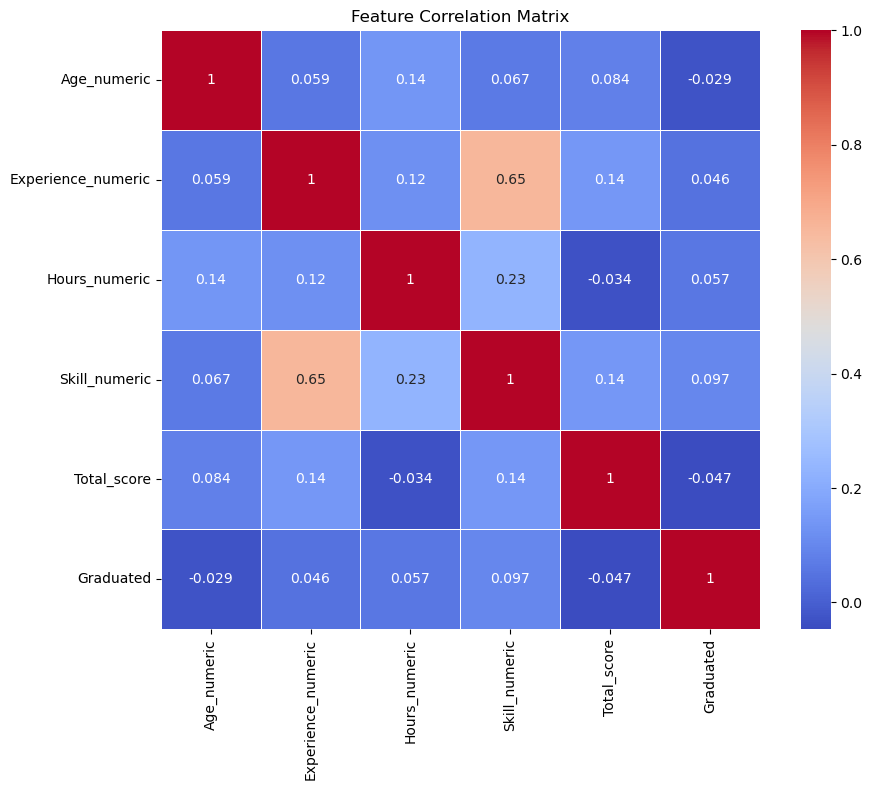

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [47]:
print("Correlation with Graduation:")
graduation_corr = df[correlation_features].corr()['Graduated'].sort_values(ascending=False)
for feature, corr_val in graduation_corr.items():
    if feature != 'Graduated':
        print(f"  {feature}: {corr_val:.3f}")

Correlation with Graduation:
  Skill_numeric: 0.097
  Hours_numeric: 0.057
  Experience_numeric: 0.046
  Age_numeric: -0.029
  Total_score: -0.047


# **Phase 4: Predictive Modelling**

## Feature Selection

In [48]:
# Prepare features for modeling
feature_columns = ['Age_numeric', 'Experience_numeric', 'Hours_numeric', 
                  'Skill_numeric', 'Total_score', 'Test_completed']

In [49]:
# Create additional features
df['Track_encoded'] = LabelEncoder().fit_transform(df['Track'])
df['Gender_encoded'] = LabelEncoder().fit_transform(df['Gender'])
feature_columns.extend(['Track_encoded', 'Gender_encoded'])

In [50]:
X = df[feature_columns]
y = df['Graduated']

In [51]:
print(f"Features used for modeling: {feature_columns}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target distribution:")
print(y.value_counts())

Features used for modeling: ['Age_numeric', 'Experience_numeric', 'Hours_numeric', 'Skill_numeric', 'Total_score', 'Test_completed', 'Track_encoded', 'Gender_encoded']
Feature matrix shape: (115, 8)
Target distribution:
Graduated
0    84
1    31
Name: count, dtype: int64


## Splitting Data to Training-Testing Samples

In [52]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 92
Test set size: 23


## Scaling and Transformation of Features

In [54]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Phase 5: Model Evaluation and Comparison**

## Modelling

In [56]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

In [57]:
results = {}

for name, model in models.items():
    print(f"\n{name}:")
    print("-" * len(name))
    
    try:
        if name == 'Logistic Regression':
            print("Training Logistic Regression with scaled data...")
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            print("Training Random Forest with original data...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        # Store results
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Predictions': y_pred,
            'Probabilities': y_pred_proba,
            'Model': model
        }
        
        print(f"✓ Model trained successfully")
        print(f"Accuracy:  {accuracy:.3f}")
        print(f"Precision: {precision:.3f}")
        print(f"Recall:    {recall:.3f}")
        print(f"F1-Score:  {f1:.3f}")
        
        # Print detailed classification report
        print(f"\nDetailed Classification Report:")
        print(classification_report(y_test, y_pred, target_names=['Not Graduated', 'Graduated']))
        
    except Exception as e:
        print(f"❌ Error training {name}: {e}")
        # Store empty results to prevent KeyError
        results[name] = {
            'Accuracy': 0.0,
            'Precision': 0.0,
            'Recall': 0.0,
            'F1-Score': 0.0,
            'Predictions': np.zeros_like(y_test),
            'Probabilities': np.zeros_like(y_test),
            'Model': None
        }


Logistic Regression:
-------------------
Training Logistic Regression with scaled data...
✓ Model trained successfully
Accuracy:  0.739
Precision: 0.694
Recall:    0.739
F1-Score:  0.688

Detailed Classification Report:
               precision    recall  f1-score   support

Not Graduated       0.76      0.94      0.84        17
    Graduated       0.50      0.17      0.25         6

     accuracy                           0.74        23
    macro avg       0.63      0.55      0.55        23
 weighted avg       0.69      0.74      0.69        23


Random Forest:
-------------
Training Random Forest with original data...
✓ Model trained successfully
Accuracy:  0.522
Precision: 0.545
Recall:    0.522
F1-Score:  0.533

Detailed Classification Report:
               precision    recall  f1-score   support

Not Graduated       0.69      0.65      0.67        17
    Graduated       0.14      0.17      0.15         6

     accuracy                           0.52        23
    macro avg      

In [58]:
# Debug: Check what's in results
print(f"\nDEBUG - Models in results dictionary:")
for model_name in results.keys():
    print(f"  ✓ {model_name}: {type(results[model_name]['Model'])}")

# Verify both models exist
required_models = ['Logistic Regression', 'Random Forest']
for model_name in required_models:
    if model_name not in results:
        print(f"❌ WARNING: {model_name} missing from results!")
    else:
        print(f"✓ {model_name} successfully stored in results")


DEBUG - Models in results dictionary:
  ✓ Logistic Regression: <class 'sklearn.linear_model._logistic.LogisticRegression'>
  ✓ Random Forest: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
✓ Logistic Regression successfully stored in results
✓ Random Forest successfully stored in results


In [59]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

results[name] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Predictions': y_pred,
    'Probabilities': y_pred_proba,
    'Model': model
}

In [60]:
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-Score:  {f1:.3f}")

# Print detailed classification report
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Graduated', 'Graduated']))

Accuracy:  0.522
Precision: 0.545
Recall:    0.522
F1-Score:  0.533

Detailed Classification Report:
               precision    recall  f1-score   support

Not Graduated       0.69      0.65      0.67        17
    Graduated       0.14      0.17      0.15         6

     accuracy                           0.52        23
    macro avg       0.42      0.41      0.41        23
 weighted avg       0.55      0.52      0.53        23



## Feature Importance Analysis

In [61]:
# Get feature importance from Random Forest
rf_model = results['Random Forest']['Model']
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

Feature Importance (Random Forest):
              feature  importance
4         Total_score    0.378427
2       Hours_numeric    0.142772
1  Experience_numeric    0.119186
3       Skill_numeric    0.109235
7      Gender_encoded    0.090307
6       Track_encoded    0.077479
0         Age_numeric    0.076746
5      Test_completed    0.005848


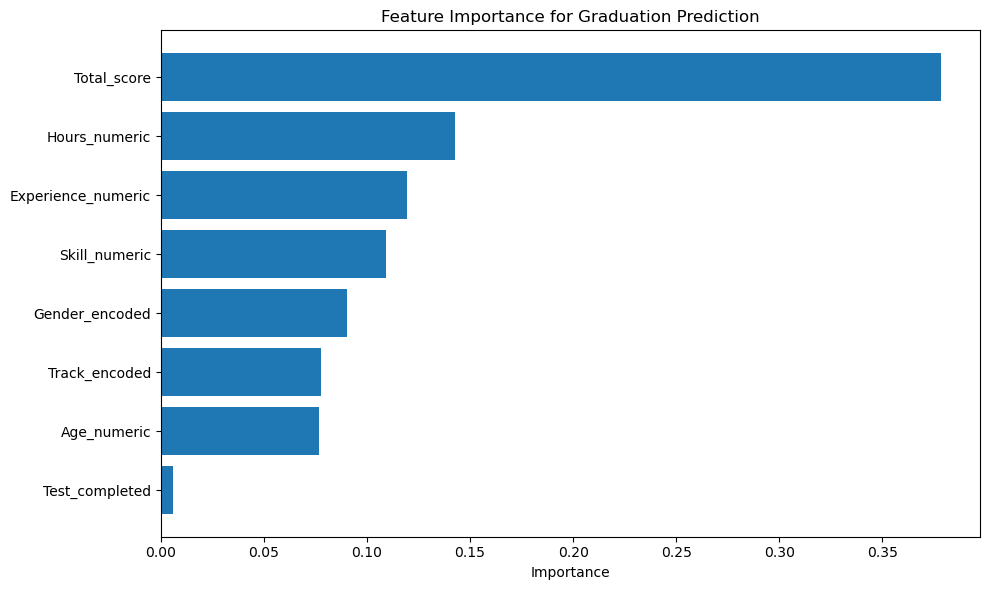

In [62]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance for Graduation Prediction')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('Feature Importance for Graduation Prediction')
plt.show()

## Model Evaluation and Interpretation

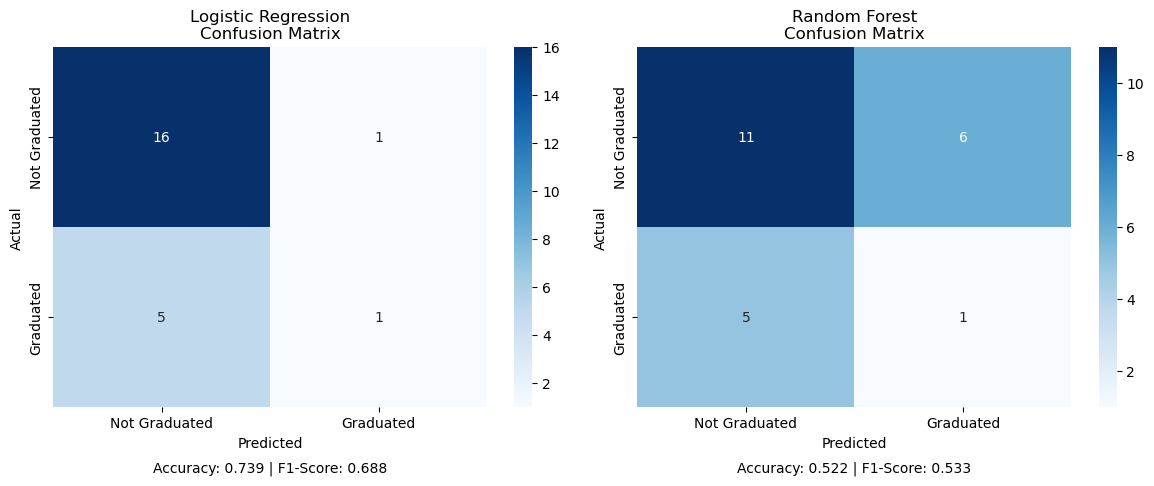

In [63]:
# Create confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Manually create confusion matrices for each model to ensure both are generated
model_names = ['Logistic Regression', 'Random Forest']

for i, model_name in enumerate(model_names):
    if model_name in results:
        cm = confusion_matrix(y_test, results[model_name]['Predictions'])
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues',
                    xticklabels=['Not Graduated', 'Graduated'],
                    yticklabels=['Not Graduated', 'Graduated'])
        axes[i].set_title(f'{model_name}\nConfusion Matrix')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
        
        # Add classification metrics as text
        accuracy = results[model_name]['Accuracy']
        f1 = results[model_name]['F1-Score']
        axes[i].text(0.5, -0.15, f'Accuracy: {accuracy:.3f} | F1-Score: {f1:.3f}', 
                    transform=axes[i].transAxes, ha='center', va='top')
    else:
        axes[i].text(0.5, 0.5, f'{model_name}\nNot Available', 
                    transform=axes[i].transAxes, ha='center', va='center')

plt.tight_layout()
plt.savefig('confusion_matrices_comparison.png')
plt.show()

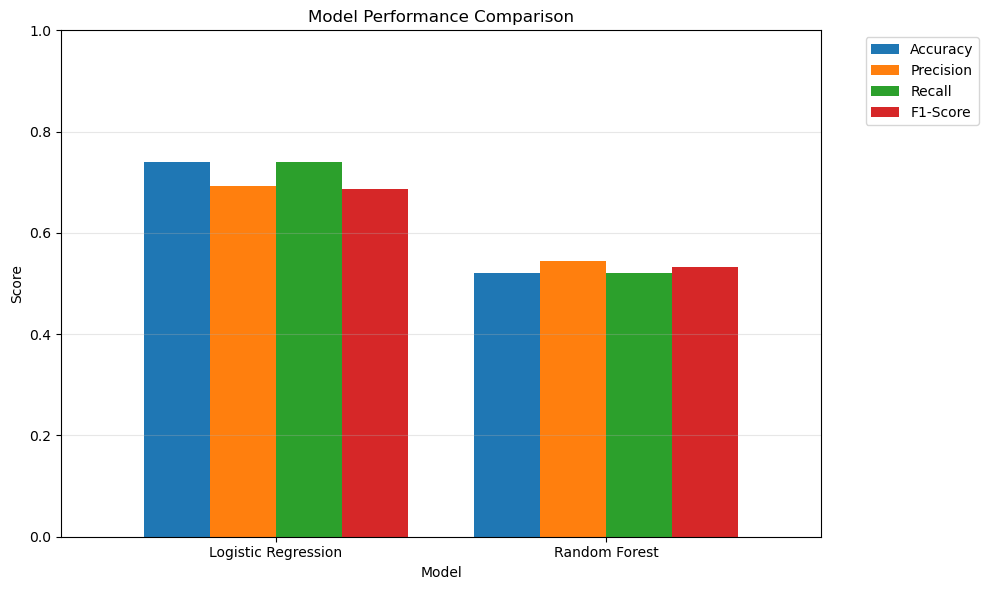

In [64]:
# Model comparison chart
metrics_df = pd.DataFrame(results).T[['Accuracy', 'Precision', 'Recall', 'F1-Score']]
ax = metrics_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

# **Phase 6: Insights and Recommendations**

In [66]:
print("DEMOGRAPHIC INSIGHTS:")
print("• Age Distribution: Majority of participants are young adults (18-34 years)")
print("• Gender: Mix of male and female participants")
print("• Location: Primarily Kenyan-based participants")
print("• Source: WhatsApp and Twitter are primary recruitment channels")

print(f"\nPERFORMANCE INSIGHTS:")
print(f"• Overall graduation rate: {df['Graduated'].mean()*100:.1f}%")
print(f"• Average aptitude score: {df['Total_score'].mean():.2f}")

top_features = feature_importance.head(3)
print(f"\nKEY SUCCESS FACTORS:")
for _, row in top_features.iterrows():
    print(f"• {row['feature']}: {row['importance']:.3f} importance")

print(f"\nMODEL PERFORMANCE:")
best_model = max(results.keys(), key=lambda x: results[x]['F1-Score'])
print(f"• Best performing model: {best_model}")
print(f"• Best F1-Score: {results[best_model]['F1-Score']:.3f}")

DEMOGRAPHIC INSIGHTS:
• Age Distribution: Majority of participants are young adults (18-34 years)
• Gender: Mix of male and female participants
• Location: Primarily Kenyan-based participants
• Source: WhatsApp and Twitter are primary recruitment channels

PERFORMANCE INSIGHTS:
• Overall graduation rate: 27.0%
• Average aptitude score: 69.01

KEY SUCCESS FACTORS:
• Total_score: 0.378 importance
• Hours_numeric: 0.143 importance
• Experience_numeric: 0.119 importance

MODEL PERFORMANCE:
• Best performing model: Logistic Regression
• Best F1-Score: 0.688


## Actionable Recommendations

In [67]:
print("FOR PROGRAM IMPROVEMENT:")
print("1. SELECTION CRITERIA:")
print("   • Prioritize candidates with higher aptitude test scores")
print("   • Consider prior experience level in admission decisions")
print("   • Focus on candidates who can commit more weekly hours")

print("\n2. PROGRAM STRUCTURE:")
print("   • Provide additional support for beginners in the data discipline")
print("   • Implement early intervention for at-risk participants")

print("\n3. RECRUITMENT STRATEGY:")
print("   • Continue leveraging WhatsApp and Twitter for outreach")
print("   • Target participants with some prior experience in data")
print("   • Emphasize time commitment requirements clearly")

print("\n4. MONITORING AND SUPPORT:")
print("   • Track progress more frequently for low-scoring participants")
print("   • Provide flexible learning paths based on skill levels")

FOR PROGRAM IMPROVEMENT:
1. SELECTION CRITERIA:
   • Prioritize candidates with higher aptitude test scores
   • Consider prior experience level in admission decisions
   • Focus on candidates who can commit more weekly hours

2. PROGRAM STRUCTURE:
   • Provide additional support for beginners in the data discipline
   • Implement early intervention for at-risk participants

3. RECRUITMENT STRATEGY:
   • Continue leveraging WhatsApp and Twitter for outreach
   • Target participants with some prior experience in data
   • Emphasize time commitment requirements clearly

4. MONITORING AND SUPPORT:
   • Track progress more frequently for low-scoring participants
   • Provide flexible learning paths based on skill levels
